# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
C_method=pd.read_excel("Contraceptive_method_dataset.xlsx")

# EDA

In [3]:
C_method.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
C_method.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
for column in C_method.columns:
    if C_method[column].dtype != 'object':
        mean = C_method[column].mean()
        C_method[column] = C_method[column].fillna(mean)    
        
C_method.isnull().sum()  

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [6]:
dups = C_method.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(C_method.shape)

Number of duplicate rows = 80
(1473, 10)


In [7]:
C_method.drop_duplicates(inplace=True)

In [8]:
dups = C_method.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(C_method.shape)

Number of duplicate rows = 0
(1393, 10)


In [9]:
for feature in C_method.columns: 
    if C_method[feature].dtype == 'object': 
        print(feature)
        print(C_method[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




In [10]:
C_method.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.559670,3.290263,2.174444
std,8.087315,2.381531,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


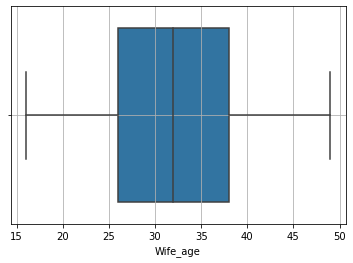

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


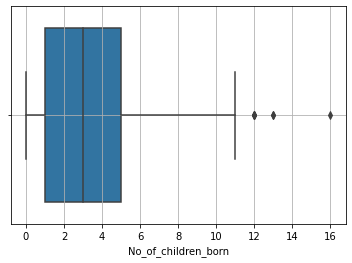

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


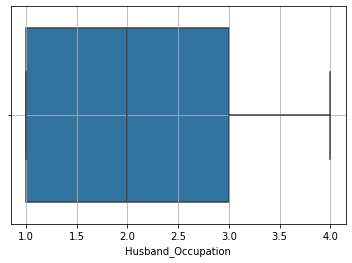

In [11]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(C_method[i],whis=1.5)
    plt.grid()
    plt.show();

In [12]:
C_method.corr()

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.528617,-0.185810
No_of_children_born,0.528617,1.000000,-0.024813
Husband_Occupation,-0.185810,-0.024813,1.000000


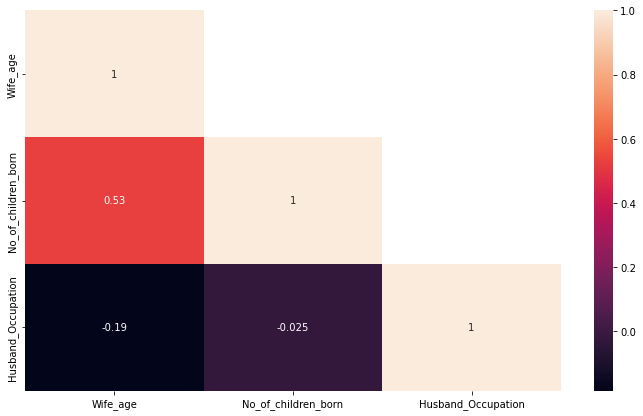

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(C_method.corr(), annot=True,mask=np.triu(C_method.corr(),+1));

In [16]:
C_method.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.559670,3.290263,2.174444
std,8.087315,2.381531,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


# Univariate Analysis

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


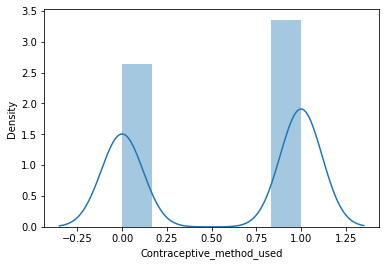

In [49]:
sns.distplot(C_method['Contraceptive_method_used'])
plt.show()

# Bivariate Analysis

In [ ]:
sns.jointplot(C_method['Contraceptive_method_used'], C_method['Wife_age']) ### annotate function of stats is to print correlation value

# Multivariate Analysis

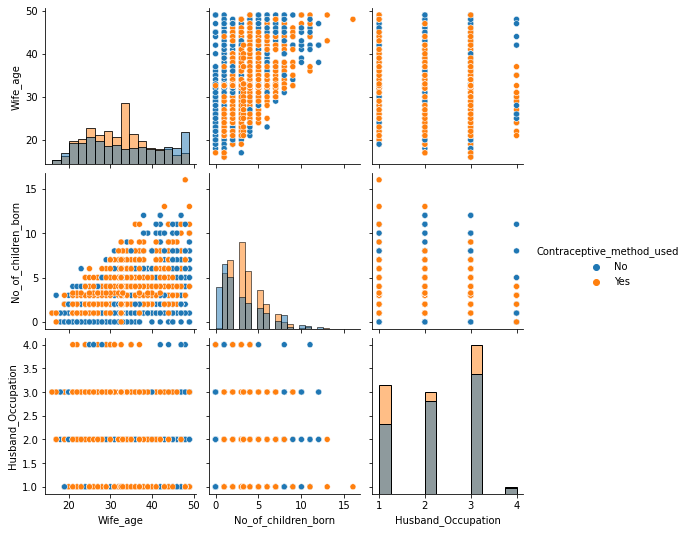

In [17]:
#Pairplot using sns
sns.pairplot(C_method ,diag_kind='hist' ,hue='Contraceptive_method_used')

In [18]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [19]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

C_method['Contraceptive_method_used'] = LE.fit_transform(C_method['Contraceptive_method_used'])
C_method.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,0
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,0
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,0
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,0
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,0


In [20]:
## Converting the other 'object' type variables as dummy variables

C_method_dummy = pd.get_dummies(C_method,drop_first=True)
C_method_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,0,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3,0,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3,0,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3,0,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3,0,1,0,0,1,0,0,1,0,1,0,0,0


In [21]:
# Copy all the predictor variables into X dataframe
X = C_method_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = C_method_dummy['Contraceptive_method_used']

In [23]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=C_method_dummy['Contraceptive_method_used'])

In [24]:
y_train.value_counts(1)

1    0.558974
0    0.441026
Name: Contraceptive_method_used, dtype: float64

In [25]:
y_test.value_counts(1)

1    0.559809
0    0.440191
Name: Contraceptive_method_used, dtype: float64

In [26]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [27]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [28]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.274512,0.725488
1,0.694425,0.305575
2,0.337056,0.662944
3,0.286788,0.713212
4,0.233647,0.766353


In [29]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.683076923076923

AUC: 0.722


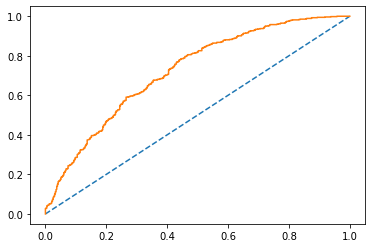

In [30]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [31]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6363636363636364

AUC: 0.722


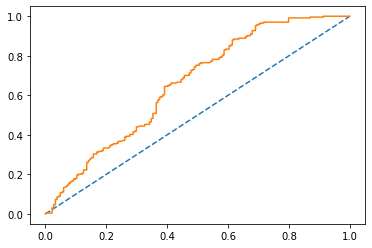

In [32]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [33]:
confusion_matrix(y_train, ytrain_predict)

array([[239, 191],
       [118, 427]], dtype=int64)

C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


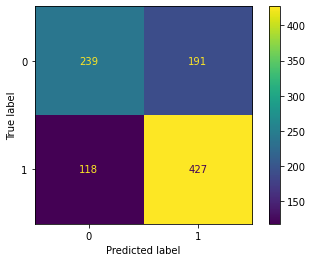

In [34]:
plot_confusion_matrix(model,X_train,y_train);

In [35]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.68       975



In [36]:
confusion_matrix(y_test, ytest_predict)

array([[ 83, 101],
       [ 51, 183]], dtype=int64)

C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


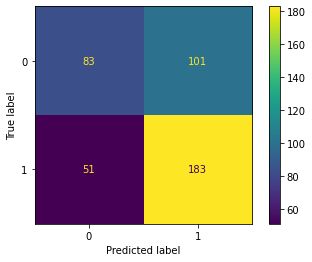

In [37]:
plot_confusion_matrix(model,X_test,y_test);

In [38]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       234

    accuracy                           0.64       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.64      0.63       418



In [39]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [40]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [41]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [43]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)


In [44]:
best_model = grid_search.best_estimator_

In [45]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [46]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.275043,0.724957
1,0.695035,0.304965
2,0.337206,0.662794
3,0.287261,0.712739
4,0.234041,0.765959


              precision    recall  f1-score   support

           0       0.67      0.56      0.61       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.68       975
 



C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


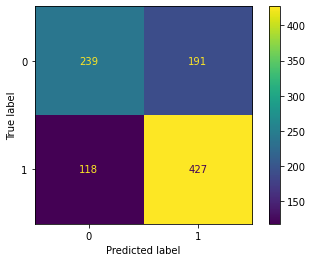

In [47]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       234

    accuracy                           0.64       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.64      0.63       418
 



C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


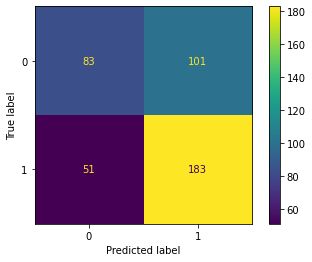

In [48]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# CONCLUSION
Note:

Precison: tells us how many predictions are actually positive out of all the total positive predicted.

Recall: how many observations of positive class are actually predicted as positive. 

Inferences:
For No contraceptive method (Label 0 ):

Precision (62%) – 62% of married not use contrceptive method out of all the married women do not use contraceptive method.

Recall (45%) – Out of all the married women who do not use contraceptive methods, 45% of womens have been predicted correctly .

For contraceptive methods (Label 1 ):

Precision (64%) – 64% of women predicted are actually having contraceptive out of all the womens predicted to have contraceptive method.

Recall (78%) – Out of all the married actually having contraceptive , 78% of women have been predicted correctly .

Overall accuracy of the model – 64 % of total predictions are correct
Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification


# LDA

In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
cell_df =pd.read_excel("Contraceptive_method_dataset.xlsx")

EDA

In [4]:
cell_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [5]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
cell_df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


# Check for the missing values

In [7]:
cell_df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [8]:
cols = ['Wife_age','No_of_children_born']
for column in cols:
    print(column)
    mode_1 = cell_df[column].mode()[0]
    print(mode_1)
    cell_df[column].fillna(value=mode_1,inplace=True)
    
cell_df.isnull().sum()

Wife_age
25.0
No_of_children_born
2.0


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [9]:
cell_df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [10]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 87


In [11]:
cell_df.drop_duplicates(inplace=True) 

In [12]:
for feature in cell_df.columns: 
    if cell_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cell_df[feature].unique()))
        print(pd.Categorical(cell_df[feature].unique()).codes)
        cell_df[feature] = pd.Categorical(cell_df[feature]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


# Proportion in the target classes

In [13]:
cell_df.Contraceptive_method_used.value_counts(normalize=True)

1    0.556999
0    0.443001
Name: Contraceptive_method_used, dtype: float64

In [14]:
from pylab import rcParams

In [15]:
rcParams['figure.figsize'] = 15,8

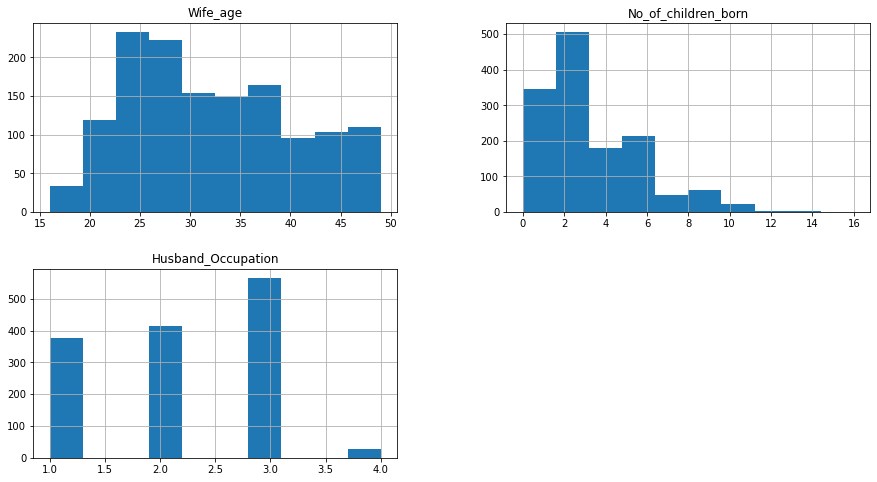

In [16]:
cell_df[['Wife_age','No_of_children_born','Husband_Occupation']].hist();

# Outlier Check

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


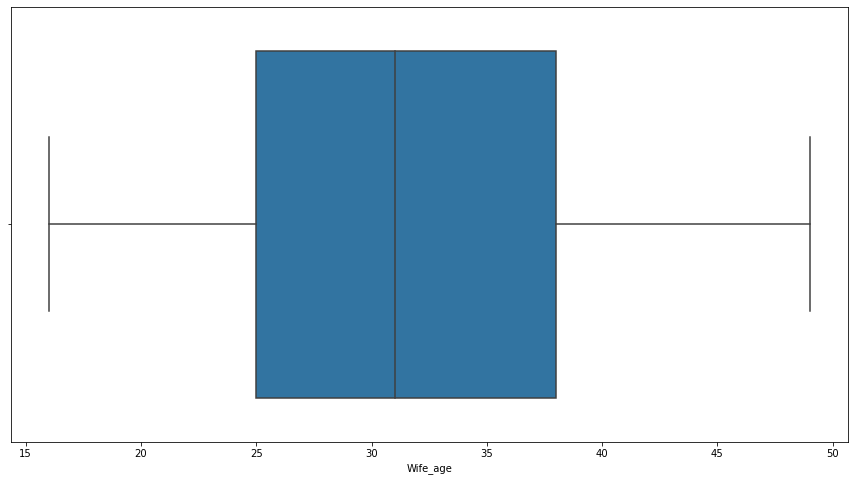

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


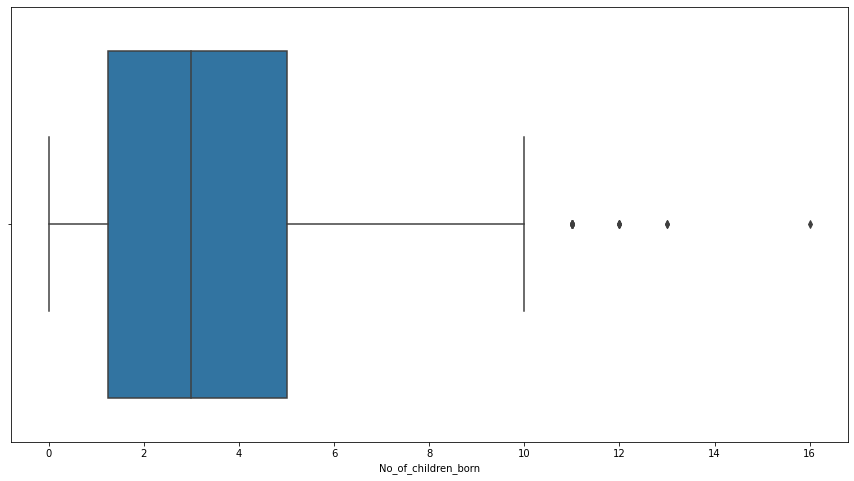

C:\Users\anand.rj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


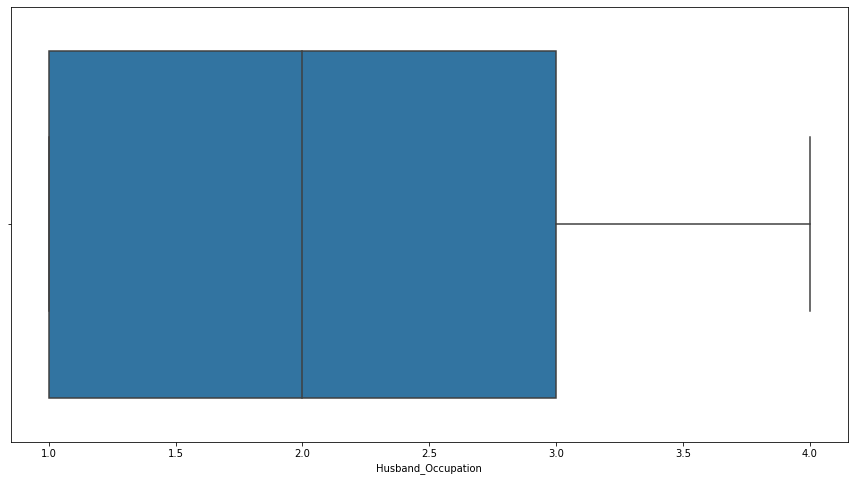

In [17]:
cols=['Wife_age','No_of_children_born','Husband_Occupation'];

for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()

# Train(70%)-Test(30%)Split

In [18]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [19]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


In [20]:
X = df.drop('Contraceptive_method_used',axis=1)
Y = df.pop('Contraceptive_method_used')

In [21]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [22]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (970, 9)
Number of rows and columns of the training set for the dependent variable: (970,)
Number of rows and columns of the test set for the independent variables: (416, 9)
Number of rows and columns of the test set for the dependent variable: (416,)


# LDA Model

In [23]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [24]:
#intercept value
clf.intercept_ 

array([2.12191175])

In [25]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.08554918,  0.17491059,  0.29407657,  0.3060997 , -0.77315667,
        -0.095835  , -0.03558419,  0.03201073, -1.0081938 ]])

In [26]:
X_train.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [27]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.09,  0.17,  0.29,  0.31, -0.77, -0.1 , -0.04,  0.03, -1.01]])

In [28]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

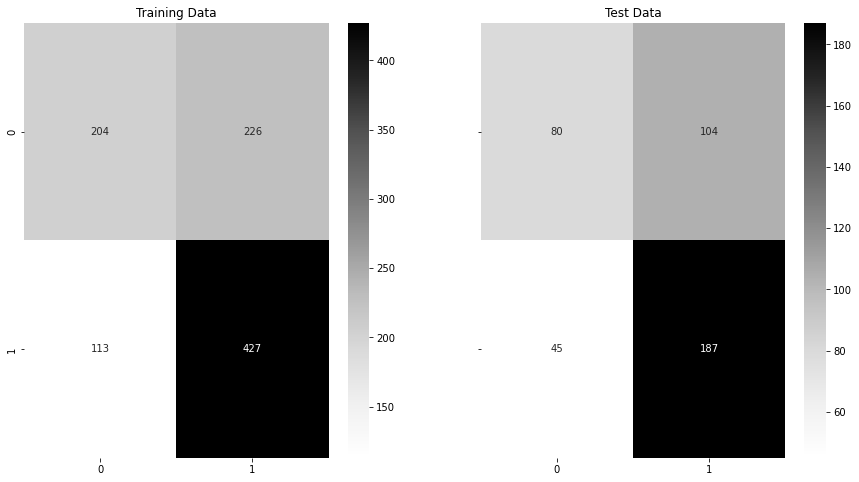

In [29]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [30]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.64      0.47      0.55       430
           1       0.65      0.79      0.72       540

    accuracy                           0.65       970
   macro avg       0.65      0.63      0.63       970
weighted avg       0.65      0.65      0.64       970
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.43      0.52       184
           1       0.64      0.81      0.72       232

    accuracy                           0.64       416
   macro avg       0.64      0.62      0.62       416
weighted avg       0.64      0.64      0.63       416
 



In [31]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [32]:
pred_prob_train[:,1]

array([0.66251004, 0.51793477, 0.82172985, 0.64022239, 0.58332255,
       0.52603721, 0.58601199, 0.46887319, 0.17219777, 0.77187582,
       0.17470455, 0.66883867, 0.664911  , 0.52640946, 0.56294243,
       0.68150833, 0.15097366, 0.76062114, 0.21502716, 0.64077855,
       0.53936593, 0.45671549, 0.62769273, 0.70943732, 0.39600853,
       0.64499514, 0.7657118 , 0.56735476, 0.34668456, 0.43151529,
       0.35923579, 0.81470007, 0.54465749, 0.38437153, 0.56954106,
       0.69485986, 0.63891018, 0.49040551, 0.69524023, 0.5720721 ,
       0.67677625, 0.46542118, 0.67582942, 0.58023652, 0.73715383,
       0.68202816, 0.61625037, 0.58367491, 0.54457092, 0.49131114,
       0.45956413, 0.65061609, 0.5274188 , 0.70387616, 0.61468865,
       0.53796012, 0.62562352, 0.67504604, 0.59261686, 0.54146238,
       0.70452168, 0.57247682, 0.77698893, 0.4345579 , 0.2233688 ,
       0.61834674, 0.31856081, 0.45970027, 0.70859427, 0.48438137,
       0.67973181, 0.52478387, 0.39246168, 0.62750189, 0.72317

AUC for the Training Data: 0.691
AUC for the Test Data: 0.640


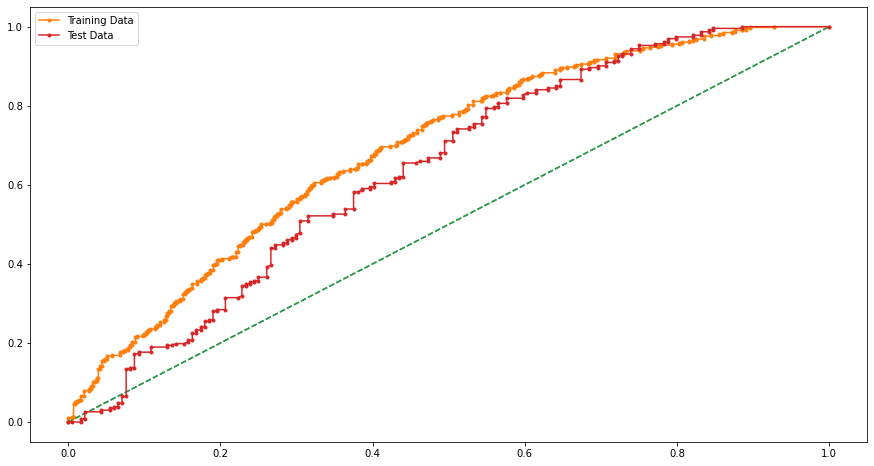

In [33]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Conclusion

The model accuracy on the training as well as the test set is about 64%, which is roughly the same proportion as the class 0 and class 1 observations in the dataset. This model is affected by a class imbalance problem. Since we only have 1473 observations, if re-build the same LDA model with more number of data points, an even better model could be built.

Please do go ahead ad try to build other classification algorithms learnt so far in the course and compare the performances of those.

# Inference

Note :

                                                 Precison : tells us how many predictions are actually positive

                                                            out of all the total positive predicted.

                                                 Recall   : how many observations of positive class are actually 

                                                            predicted as positive. 

Inferences using the default value 0.5 for cut-off for test data

For {Customer who didnot Churn (Label 0 )}:

Precision (64%) – 64% of the married women not use Contraceptive method,out of all the married women.

Recall (43%) – Out of all the women who will not use contraceptive method , 43% of women are not using the contraceptive method .

For {Customer who did Churn (Label 1 )}:

Precision (64%) – 64% of women who used contraceptive method are correctly predicted ,out of all the married women who used contraceptive method that are predicted .

Recall (81%) – Out of all the married women who used contraceptive methods , 81% of married women who did used contraceptive methods have been predicted correctly .

Overall accuracy of the model – 85 % of total predictions are correct

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

END

# CART

In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [35]:
data_df =pd.read_excel("Contraceptive_method_dataset.xlsx")

Checking the data

In [36]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [37]:
data_df.shape

(1473, 10)

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [39]:
cols = ['Wife_age','No_of_children_born']
for column in cols:
    print(column)
    mode_1 = data_df[column].mode()[0]
    print(mode_1)
    data_df[column].fillna(value=mode_1,inplace=True)
    
data_df.isnull().sum()

Wife_age
25.0
No_of_children_born
2.0


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [40]:
# Are there any duplicates ?
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 87


In [41]:
data_df.drop_duplicates(inplace=True) 

In [42]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature] = pd.Categorical(data_df[feature]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1386 non-null   float64
 1   Wife_ education            1386 non-null   int8   
 2   Husband_education          1386 non-null   int8   
 3   No_of_children_born        1386 non-null   float64
 4   Wife_religion              1386 non-null   int8   
 5   Wife_Working               1386 non-null   int8   
 6   Husband_Occupation         1386 non-null   int64  
 7   Standard_of_living_index   1386 non-null   int8   
 8   Media_exposure             1386 non-null   int8   
 9   Contraceptive_method_used  1386 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 52.8 KB


In [44]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


# Extracting the target columns intoseperate vectors for training set and test set

In [45]:
X = data_df.drop("Contraceptive_method_used", axis=1)

y = data_df.pop("Contraceptive_method_used")

X.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
0,24.0,0,1,3.0,1,0,2,0,0
1,45.0,3,1,10.0,1,0,3,2,0
2,43.0,0,1,7.0,1,0,3,2,0
3,42.0,1,0,9.0,1,0,3,0,0
4,36.0,1,1,8.0,1,0,3,1,0


# Splitting data into training and test set

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Checking the dimensions of the training and test data

In [47]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (970, 9)
X_test (416, 9)
train_labels (970,)
test_labels (416,)
Total Obs 11548


# Building a decision Tree Classifier

In [48]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [49]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [50]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [51]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.327824
No_of_children_born       0.242561
Wife_ education           0.120340
Standard_of_living_index  0.080073
Husband_Occupation        0.069282
Wife_religion             0.048915
Husband_education         0.047297
Wife_Working              0.047073
Media_exposure            0.016635


# Predicting Test data

In [52]:
y_predict = dt_model.predict(X_test)

In [53]:
y_predict.shape

(416,)

# Regularising the decision

In [54]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

# Generating New Tree

In [55]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

# Variable importance

In [56]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                          Imp
Wife_age                  0.0
Wife_ education           0.0
Husband_education         0.0
No_of_children_born       0.0
Wife_religion             0.0
Wife_Working              0.0
Husband_Occupation        0.0
Standard_of_living_index  0.0
Media_exposure            0.0


# Predicting on training and test dataset

In [57]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [58]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (970,)
ytest_predict (416,)


# Getting the predicted classes

In [60]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [0.4371134, 0.5628866],
       [

In [61]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.437113,0.562887
1,0.437113,0.562887
2,0.437113,0.562887
3,0.437113,0.562887
4,0.437113,0.562887


# Model Evaluation

# Measuring AUC-ROC Curve

In [62]:
import matplotlib.pyplot as plt

# AUC and ROC for the training data

AUC: 0.500


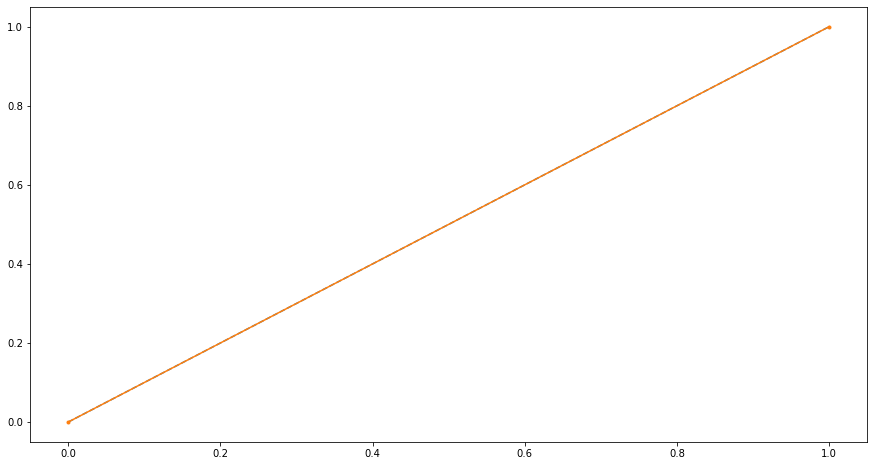

In [63]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.500


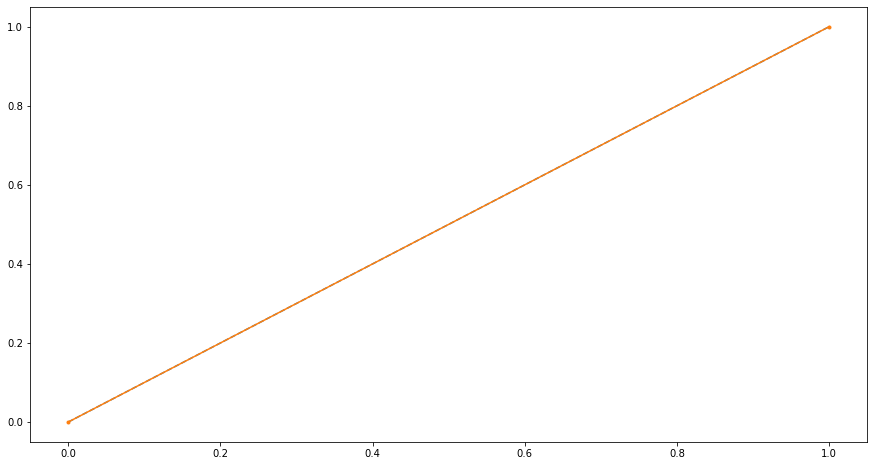

In [64]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Confusion matrix for the training data

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
confusion_matrix(train_labels, ytrain_predict)

array([[  0, 424],
       [  0, 546]], dtype=int64)

In [67]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.5628865979381443

In [68]:
print((0+546)/(0+424+0+546))

0.5628865979381443


In [69]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       424
           1       0.56      1.00      0.72       546

    accuracy                           0.56       970
   macro avg       0.28      0.50      0.36       970
weighted avg       0.32      0.56      0.41       970



C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion matrix for test data

In [70]:
confusion_matrix(test_labels, ytest_predict)

array([[  0, 190],
       [  0, 226]], dtype=int64)

In [71]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.5432692307692307

In [72]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.54      1.00      0.70       226

    accuracy                           0.54       416
   macro avg       0.27      0.50      0.35       416
weighted avg       0.30      0.54      0.38       416



C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand.rj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion 
Accuracy on the Training Data: 56% 
Accuracy on the Test Data: 54%

AUC on the Training Data: 50% 
AUC on the Test: 50%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

Since the model only has 1473 entries the accuracy is lesser. Maybe if we train and test the model with the higher dataset. It will provide a much better result.